## Logistic Regression

Logistic regression is a **classification algorithm** used to model the probability that a binary target variable $ y \in \{0, 1\} $ belongs to class 1, given input features $ x \in \mathbb{R}^n $.


In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split

In [2]:
## Generating synthetic dataset

X, y = make_classification(
    n_samples = 200,
    n_features = 2,
    n_redundant = 0,
    n_clusters_per_class = 1,
    class_sep = 1.5,
    random_state = 42
)

X_b = np.c_[np.ones((X.shape[0], 1)), X]

X_train, X_test, y_train, y_test = train_test_split(X_b, y, test_size = 0.2, random_state = 42)

We use the **sigmoid function** to map predictions to probabilities:

$$
h_\theta(x) = \sigma(z) = \frac{1}{1 + e^{-z}}, \quad \text{where } z = \theta^T x
$$

- $ h_\theta(x) $ is the predicted probability that $ y = 1 $
- $ \theta \in \mathbb{R}^n $ are the model parameters


$$
\hat{y} =
\begin{cases}
1 & \text{if } h_\theta(x) \geq 0.5 \\
0 & \text{if } h_\theta(x) < 0.5
\end{cases}
$$

In [3]:
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

### Loss Function: Log-Likelihood

The likelihood of the observed data is:

$$
P(y \mid x; \theta) = h_\theta(x)^y (1 - h_\theta(x))^{1 - y}
$$

Taking the log gives the **log-likelihood**:

$$
\ell(\theta) = \sum_{i=1}^{m} \left[ y^{(i)} \log h_\theta(x^{(i)}) + (1 - y^{(i)}) \log(1 - h_\theta(x^{(i)})) \right]
$$

To train the model, we **minimize the negative log-likelihood** (cross-entropy loss):

$$
J(\theta) = -\frac{1}{m} \sum_{i=1}^{m} \left[ y^{(i)} \log h_\theta(x^{(i)}) + (1 - y^{(i)}) \log(1 - h_\theta(x^{(i)})) \right]
$$


In [4]:
def compute_loss(X, y, theta):
    z = X @ theta
    h = sigmoid(z)
    # prevent log 0:
    epsilon = 1e-15
    loss = -np.mean(y * np.log(h + epsilon) + (1-y) * np.log(1-h + epsilon))
    return loss

### Gradient of the Loss

The gradient with respect to $ \theta $ is:

$$
\nabla_\theta J(\theta) = \frac{1}{m} \sum_{i=1}^{m} \left( h_\theta(x^{(i)}) - y^{(i)} \right) x^{(i)}
$$


### Gradient Descent Update Rule

$$
\theta := \theta - \alpha \cdot \nabla_\theta J(\theta)
$$

- $ \alpha $ is the learning rate
- Repeat this update over multiple epochs until convergence


In [5]:
def train_lr(X, y, lr = 0.1, epochs = 1000):
    m, n = X.shape
    theta = np.zeros(n)

    for epoch in range(epochs):
        z = X @ theta
        h = sigmoid(z)
        gradient = X.T @ (h-y) /m
        theta -= lr * gradient

        if epoch % 100 ==0:
            print(f"Epoch {epoch}: Loss = {compute_loss(X, y, theta):.4f}")
    
    return theta

In [7]:
theta = train_lr(X_train, y_train, lr=0.1, epochs=1000)

def predict(X, theta, threshold=0.5):
    probs = sigmoid(X @ theta)
    return (probs >= threshold).astype(int)

y_pred = predict(X_test, theta)
accuracy = np.mean(y_pred == y_test)
print(f"Test Accuracy: {accuracy:.2%}")

Epoch 0: Loss = 0.6383
Epoch 100: Loss = 0.2195
Epoch 200: Loss = 0.2038
Epoch 300: Loss = 0.1982
Epoch 400: Loss = 0.1951
Epoch 500: Loss = 0.1932
Epoch 600: Loss = 0.1918
Epoch 700: Loss = 0.1908
Epoch 800: Loss = 0.1901
Epoch 900: Loss = 0.1896
Test Accuracy: 95.00%


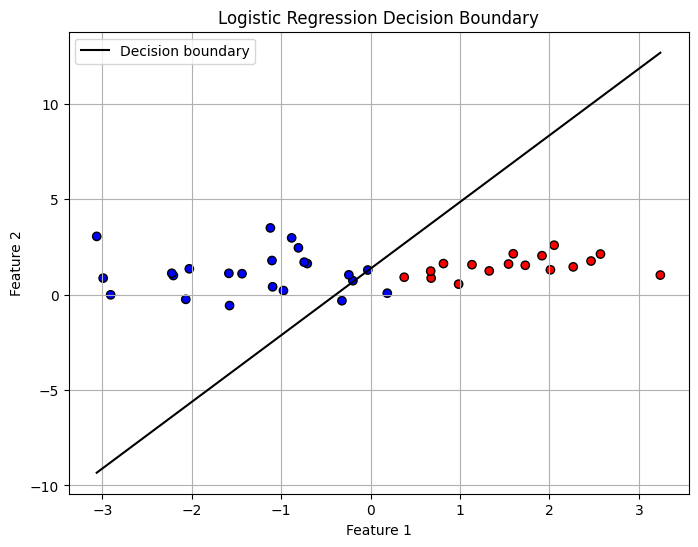

In [11]:
def plot_decision_boundary(X, y, theta):
    plt.figure(figsize=(8, 6))
    plt.scatter(X[:, 1], X[:, 2], c=y, cmap='bwr', edgecolors='k')
    
    x1 = np.linspace(X[:, 1].min(), X[:, 1].max(), 100)
    x2 = -(theta[0] + theta[1]*x1) / theta[2]
    plt.plot(x1, x2, color='black', label='Decision boundary')
    
    plt.xlabel("Feature 1")
    plt.ylabel("Feature 2")
    plt.title("Logistic Regression Decision Boundary")
    plt.legend()
    plt.grid(True)
    plt.show()

plot_decision_boundary(X_test, y_test, theta)
